Task-1: Generate image with a horizontal line and display it

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
seed=1234
rng = np.random.default_rng(seed)

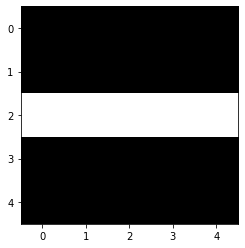

In [15]:
x = np.zeros((5,5))
x[2] = 1

plt.imshow(x, cmap='gray')

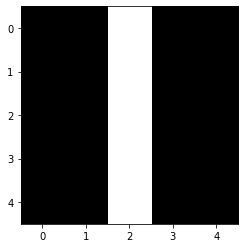

In [16]:
x = np.zeros((5,5))
x[:, 2] = 1

plt.imshow(x, cmap='gray')

Task-2: Add noise to the above images

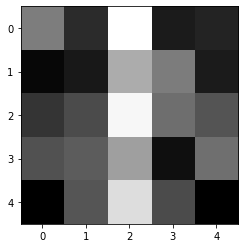

In [17]:
x = np.zeros((5,5))
x[:, 2] = 1
x = x + rng.uniform(size=25).reshape(5,5)

plt.imshow(x, cmap='gray')

Task-3: Generate the base data-set.  Add 500 datapoints, 250 in each class.  X and y.

In [18]:
# 250 datapoints for class-1
def generate(num, imsize, label, noise_factor=0.2):
    X = np.zeros((num, imsize, imsize))
    
    mid = imsize // 2
    if label:
        X[:, mid, :] = 1
    else:
        X[:, :, mid] = 1
    
    X += rng.uniform(size=X.shape) * noise_factor
    return X.reshape(num, -1), label * np.ones(num)

0.0


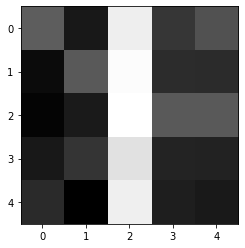

In [19]:
x0, y0 = generate(100, 5, 0, 0.5)
x1, y1 = generate(100, 5, 1, 0.5)
X = np.concatenate((x0, x1))
y = np.concatenate((y0, y1))
plt.imshow(X[10].reshape(5,5), cmap='gray')
print(y[10])

Task-4: Divide data into train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 25) (160,)
(40, 25) (40,)


Task-5: LogisticRegression class

In [21]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def preprocess(X):
    return np.column_stack((np.ones(X.shape[0]), X))

For logistic regression:

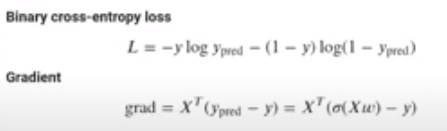

In [22]:
class LogisticRegression():
    def __init__(self, lr=0.01):
        self.w = None
        self.losses = []
        self.lr = lr
        
    def grad(self, X, y, y_pred):
        return X.T @ (y_pred - y)
    
    def loss(self, y_prob, y):
        return np.sum(-y * np.log(y_prob) - (1 - y) * np.log(1 - y_prob))
        
    def prob(self, X):
        return sigmoid(X @ self.w)

    def fit(self, X, y, epochs=100):
        #Batch-gradient descent
        X = preprocess(X)
        self.w = rng.standard_normal(X.shape[1])
        for epoch in range(epochs):
            self.w -= self.lr * self.grad(X, y, self.prob(X))
            self.losses.append(self.loss(self.prob(X), y))
    def predict(self, X, thresh=0.5):
        return (self.prob(X) > thresh).astype(np.int)

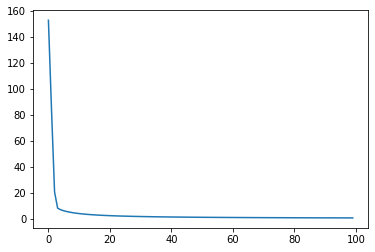

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, 100)
plt.plot(np.arange(100), logreg.losses)

In [24]:
#accuracy
y_pred = logreg.predict(preprocess(X_test))
print(np.sum(y_pred == y_test)/y_test.shape[0])

1.0


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
